# Analyse exploratoire des données
## José Lise



In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine


In [2]:
# Load the data into a pandas dataframe
engine = create_engine('sqlite:///data.db', echo=False)
con = engine.connect()
df_patient = pd.read_sql('select * from patient', con=con)
df_pcr = pd.read_sql('select * from test', con=con)
con.close()

In [3]:
# check the data
df_patient.head()

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
0,221958,matisse,clarke,13.0,rene street,ellenbrook,2527,wa,19710708.0,32.0,08 86018809,westella
1,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown
2,231932,alice,conboy,35.0,mountain circuit,prospect,2305,nsw,19810905.0,22.0,02 20403934,None
3,465838,sienna,craswell,39.0,cumberlegeicrescent,henty,3620,wa,19840809.0,30.0,02 62832318,jodane
4,359178,joshua,bastiaans,144.0,lowrie street,campbell town,4051,nsw,19340430.0,31.0,03 69359594,None


In [4]:
df_pcr.head()

,patient_id,pcr
0,653091,N
1,347667,Negative
2,708481,Positive
3,148825,Negative
4,150081,Negative


## Suppression des doublons (déduplication)

In [5]:
from detect_duplicates import detect_duplicates

In [6]:
df_clean = detect_duplicates(df_patient)

Percentage of duplicate rows:  6.975
Number of rows removed:  1395


###  Nettoyage de la clé patient_id de df_clean
La colonne patient_id est supposé être un clé et donc être unique. Or nous avons vu que cette clé est dupliquée que ce soit pour la table df_patient et df_pcr. Comme cette clé va être utilisé pour fusionner les tables, nous allons effacer les clés en double dans les deux tables au préalable. 

In [7]:
# Check the duplicated patient_id rows 
# We see that these are not the same persons but inconsistencies in the labelling
df_clean[df_clean.duplicated(subset=['patient_id'], keep=False)].sort_values(by=['patient_id'])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
14839,109304,bailey,donaldson,20.0,tardent street,ryde,0812,qld,19580310.0,26.0,07 13479210,None
12117,109304,zachary,farronato,30.0,outtrim avenue,como,2196,vic,19090801.0,31.0,07 22894061,the reefs
4386,110207,toby,brock,4.0,merriman crescent,baralaba,3025,nsw,19000424.0,35.0,08 33842007,leitrim
12989,110207,zali,brock,32.0,hedger street,toorak,5038,act,NaN,22.0,08 96818512,None
19629,115791,marley,colquhoun,7.0,boolee street,craigie,2534,qld,19000705.0,NaN,04 59547776,None
...,...,...,...,...,...,...,...,...,...,...,...,...
10507,990695,erin,braunack,49.0,moondarra street,broken hill,2640,qld,19830122.0,30.0,03 69523317,yuulong
8764,990936,amy,royle,90.0,whittell crescent,coramba,5032,sa,19950326.0,NaN,08 07309295,tewantin plaza
12563,990936,samantha,green,21.0,brierly street,ardrossan,2140,None,19380210.0,29.0,02 51600621,None
7961,994235,teresa,chowdhury,60.0,None,chester hill,2147,vic,19010407.0,27.0,02 83271460,None


In [8]:
# Remove the duplicated rows. In this case we remove all of them as we don't know which one is correct or not
# That's why we use the option keep=False in the duplicated method
df_clean = df_clean[~df_clean.duplicated(subset=['patient_id'], keep=False)]
df_clean.sort_values(by=['patient_id'])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
17827,100005,kiana,halley,46.0,mccann street,undercliffe,4210,vic,19630118.0,32.0,07 32322867,None
16192,100015,michael,mcvicar,153.0,mountain circuit,wendouree,3338,nsw,19780918.0,27.0,08 55502793,None
12513,100037,ella,clarke,91.0,None,oyster bay,4208,vic,19800422.0,36.0,08 45736238,None
17517,100064,alexandra,jeffries,9.0,barlow street,joondanna,2617,vic,19020724.0,37.0,08 47796510,None
1387,100126,jayden,clarke,6.0,pennefather street,orange,2904,qld,19181210.0,29.0,03 27525454,lachlan view
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,999607,joshua,ryan,105.0,tanumbirini street,mirrabooka,5109,sa,19990219.0,29.0,08 45059414,nareen gardens hostel
155,999684,charlie,hendricks,32.0,david street,yass,4740,sa,19351111.0,29.0,None,None
11832,999751,kierra,godfrey,262.0,macarthur avenue,st ives,3356,qld,19490722.0,19.0,03 61193186,None
1534,999885,mhary,ulrick,13.0,sonder close,clayton,4744,vic,19310509.0,NaN,07 14497722,None


### Analyse de la colonne date_of_birth après le nettoyage

In [9]:
df_clean[(df_clean['date_of_birth'].duplicated(keep=False) & df_clean['date_of_birth'].notnull())  & 
           #df_clean['date_of_birth'].notnull() & df_clean['age'].notnull()
         (~df_clean.duplicated(subset=['date_of_birth', 'age'], keep=False) & df_clean['age'].notnull())
          ].sort_values(by=[ 'date_of_birth', 'age'])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
18277,159263,danielle,haskett,7.0,bacchus circuit,highton,6004,vic,19000308.0,27.0,02 98666790,lakeside leisure vlge
12653,930890,reganne,fysh,41.0,fellows street,broadwater,4105,qld,19000311.0,35.0,04 74328837,None
17871,480129,keeley,arulanandam,27.0,carina street,albion park rail,3081,nsw,19000311.0,37.0,03 90267379,tannamurra
1487,357009,joshua,campbell,45.0,thring place,altona north,4032,nsw,19000322.0,8.0,02 45947636,None
15577,763632,erin,ryan,20.0,verbrugghen street,daisy hill,2200,nsw,19000419.0,22.0,04 35593327,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9580,571068,olivia,nguyen,34.0,ifould place,lyrup,6008,vic,19991205.0,10.0,07 08950579,None
13062,269807,abby,moody,93.0,corringle close,port macquarie,2077,qld,19991205.0,30.0,08 48630430,None
3975,291420,james,miles,39.0,myles close,scarborough,3206,None,19991215.0,27.0,03 76203772,None
18334,355560,sonja,frahn,29.0,prisk place,karuah,5451,vic,19991218.0,9.0,07 10184443,None


L'instruction dans la cellule précédente montre les personnes avec le même date_of_birth mais des age différents. Mais on trouve également les personnes qui ont les mêmes date_of_birth mais ou un des ages est manquant. Pour avoir le nombre de personnes avec le même date_of_birth mais des age différents il faut faire la somme des date_of_birth avec au moins 2 lignes, ce qui est fait ci-dessous.

In [10]:
(df_clean[(df_clean['date_of_birth'].duplicated(keep=False) & df_clean['date_of_birth'].notnull())  & 
         (~df_clean.duplicated(subset=['date_of_birth', 'age'], keep=False) & df_clean['age'].notnull())
          ].groupby('date_of_birth').count() ['patient_id']>=2).sum()


1761

Il y a donc 1761 personnes avec le même date_of_birth et un age différent. Comparons avec le nombre de personnes avec le même date_of_birth et age. 

In [11]:
 df_clean[df_clean.duplicated(subset=['date_of_birth', 'age'], keep=False)  & 
         df_clean['date_of_birth'].notnull() &  df_clean['age'].notnull() ].sort_values(
          by=[ 'date_of_birth','age'])

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2
5802,253939,benjamin,clarke,92.0,legge street,tatura,4053,nsw,19001020.0,29.0,04 57824939,rosetta village
19139,392338,kate,crisci,22.0,jim pike avenue,gleniffer,4114,qld,19001020.0,29.0,02 02328441,kurrajong
2672,295246,neve,mcgregor,82.0,battersby circuit,mosman,5280,None,19020108.0,35.0,07 72334102,warrumbungle
16422,304573,angus,paphitis,1.0,jauncey court,coldstream,2767,vic,19020108.0,35.0,07 56235748,None
5409,274875,lauren,talladira,62.0,miranda place,ardeer,5159,nsw,19030410.0,30.0,04 44730065,None
...,...,...,...,...,...,...,...,...,...,...,...,...
6026,611760,nicholas,white,30.0,blowering street,yorkeys knob,4114,vic,19990624.0,31.0,02 46605018,briardale
12356,267022,lucy,boyle,14.0,templestowe avenue,mooroolbark,3844,sa,19990901.0,33.0,None,mckinnon glen
14390,684398,patrick,haythorpe,93.0,None,cooloongup,2009,qld,19990901.0,33.0,03 00661569,lawless
7687,510226,teneille,monteleone,17.0,tallara parkway,heckenberg,4350,nsw,19990918.0,28.0,07 96409448,None


Il y a 211 personnes avec des le même date_of_birth et age, ce qui est très inférieur à 1761. Donc date_of_birth ne permet pas de prédire l'age. Et cette colonne ne sera pas utilisable pour la suite de l'analyse. 

### Nettoyage de la colonne patient_id de df_pcr

In [12]:
# we do the same thing for the df_pcr dataframe
df_pcr[df_pcr.duplicated(subset=['patient_id'], keep=False)].sort_values(by=['patient_id'])

,patient_id,pcr
169,159500,N
2934,159500,N
8469,169519,Positive
1842,169519,Negative
5618,212217,N
...,...,...
5542,887646,Negative
1025,975512,Negative
2331,975512,N
7477,990695,N


On a déjà noté lors de l'analyse des problèmes que la colonne pcr n'est pas consistante: Quelquefois les test négatifs sont notés Negative et quelquefois N. Et idem pour les tests positif. Nous allons harmoniser cela et garder uniquement N et P comme indicateurs. 

In [13]:
# Clean the pcr column to keep only N and P values
df_pcr['pcr'] = df_pcr['pcr'].apply(lambda x: 'P' if x == 'Positive' else 'N')

Nous allons maintenant regarder les lignes dupliquées pour 'patient_id' et 'pcr'

In [14]:
# Check rows where 'patient_id' and 'pcr'
df_pcr[df_pcr.duplicated(subset=['patient_id', 'pcr'], keep=False)].sort_values(by=['patient_id'])

,patient_id,pcr
169,159500,N
2934,159500,N
8249,227192,N
1473,227192,N
8591,227309,N
5785,227309,N
3251,328071,P
4741,328071,P
3569,411955,N
4939,411955,N


Contrairement au dataframe df_patient, ici les lignes dupliqués sont vraiment identiques. Nous allons donc uniquement supprimer les lignes en doubles. 

In [102]:
 df_pcr = df_pcr[~df_pcr.duplicated(subset=['patient_id','pcr'], keep='last')]
df_pcr.sort_values(by=['patient_id'])

,patient_id,pcr
1900,100037,N
3919,100215,N
1733,100294,N
1672,100363,N
1880,100404,N
...,...,...
8770,999482,N
3453,999497,P
8010,999573,N
8326,999885,N


Regardons maintenant les lignes avec le même patient_id mais des pcr différents. 

In [16]:
# Rows with same patient_id but different pcr
# In this case we will remove both rows
df_pcr[df_pcr.duplicated(subset=['patient_id'], keep=False)].sort_values(by=['patient_id'])

,patient_id,pcr
1842,169519,N
8469,169519,P
8615,212217,P
5618,212217,N
6355,231458,N
2463,231458,P
1805,378910,N
5381,378910,P
2340,513532,P
3163,513532,N


On ne peut rien conclure sur ces patients. Il faut donc supprimer toutes les lignes se trouvant dans ce cas, ce qui est fait ci-dessous. 

In [17]:
 df_pcr = df_pcr[~df_pcr.duplicated(subset=['patient_id'], keep=False)]
df_pcr.sort_values(by=['patient_id'])

,patient_id,pcr
1900,100037,N
3919,100215,N
1733,100294,N
1672,100363,N
1880,100404,N
...,...,...
8770,999482,N
3453,999497,P
8010,999573,N
8326,999885,N


Jointure des deux dataframe d_clean et df_pcr. Le dataframe issue de la jointure est appelée df_tested et va être utilisé pour l'analyse exploratoire. 

In [18]:
# Merge the dataframes
#df_test = df_clean.copy()
df_tested = df_clean.merge(df_pcr, how='inner')
df_tested

,patient_id,given_name,surname,street_number,address_1,suburb,postcode,state,date_of_birth,age,phone_number,address_2,pcr
0,771155,joshua,elrick,23.0,andrea place,east preston,2074,nsw,19120921.0,34.0,02 97793152,foxdown,N
1,744167,ky,laing,448.0,nyawi place,barmera,3556,qld,19050919.0,32.0,03 59872070,None,N
2,210268,matthew,laing,11.0,barnes place,laurieton,2160,nsw,19061018.0,29.0,02 86925029,None,N
3,832180,jack,renfrey,27.0,osmand street,maribyrnong,2170,qld,19610518.0,31.0,03 15575583,dhurringill,N
4,154886,adele,ryan,76.0,house circuit,new farm,2200,qld,19430102.0,33.0,07 37444521,None,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8064,230775,victoria,whiteley,12.0,beasley street,landsborough,2388,nsw,19491217.0,30.0,03 68108604,ponderosa,N
8065,407822,sarah,matthews,58.0,zox circuit,seven hills,3174,nsw,19241001.0,25.0,08 77093884,lagoon farm,N
8066,704579,michael,eglinton,215.0,ambalindum street,birmingham gardens,2604,vic,19140808.0,7.0,02 85100697,None,P
8067,329489,amber,leeuwenburg,50.0,None,glenwood,2578,vic,19720229.0,25.0,03 46144930,None,P


## Analyse exploratoire

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns 
from  matplotlib.ticker import FuncFormatter
%matplotlib inline

In [20]:
df_tested.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8069 entries, 0 to 8068
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   patient_id     8069 non-null   int64  
 1   given_name     7891 non-null   object 
 2   surname        7911 non-null   object 
 3   street_number  7927 non-null   float64
 4   address_1      7776 non-null   object 
 5   suburb         7984 non-null   object 
 6   postcode       7984 non-null   object 
 7   state          7242 non-null   object 
 8   date_of_birth  7285 non-null   float64
 9   age            6461 non-null   float64
 10  phone_number   7669 non-null   object 
 11  address_2      3195 non-null   object 
 12  pcr            8069 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 882.5+ KB


In [21]:
df_tested.isnull().sum()

patient_id          0
given_name        178
surname           158
street_number     142
address_1         293
suburb             85
postcode           85
state             827
date_of_birth     784
age              1608
phone_number      400
address_2        4874
pcr                 0
dtype: int64

On note qu'il y a des valeurs nulles dans toutes les colonnes exceptées pour les colonnes patient_id et pcr. 

In [23]:
(df_tested['postcode'].value_counts() > 22.0).sum()

17

In [24]:
df_tested.groupby('postcode').count().sort_values(by='patient_id',ascending=False).head(20)

,patient_id,given_name,surname,street_number,address_1,suburb,state,date_of_birth,age,phone_number,address_2,pcr
postcode,,,,,,,,,,,,
4350,40,40,39,40,39,39,37,39,29,37,13,40
2170,32,31,32,32,32,32,27,29,24,30,11,32
4670,28,28,26,28,27,27,26,28,23,26,10,28
4740,27,27,25,26,25,26,26,26,21,26,14,27
4305,27,26,27,27,25,27,27,23,22,25,8,27
2560,26,25,26,26,25,25,24,22,17,24,7,26
6210,26,26,26,24,25,26,24,22,20,23,9,26
2750,25,22,21,25,25,25,22,23,23,24,13,25
3150,24,24,23,24,22,23,21,24,18,24,9,24


### Analyse des tests PCR

In [104]:
df_tested['pcr'].value_counts()

N    6900
P    1169
Name: pcr, dtype: int64

<AxesSubplot:xlabel='pcr', ylabel='count'>

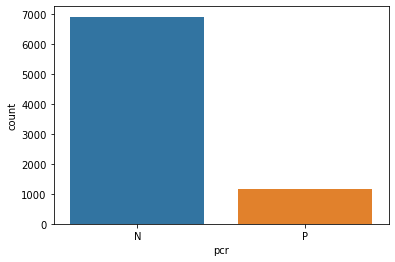

In [25]:
sns.countplot(x = 'pcr', data = df_tested)

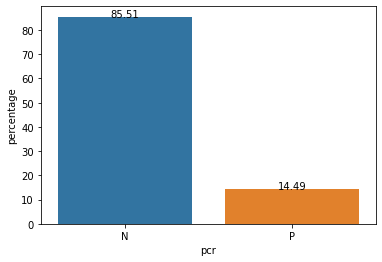

In [54]:

groupedvalues=df_tested.groupby('pcr')['patient_id'].count().rename('percentage').reset_index() 
groupedvalues['percentage'] = groupedvalues['percentage'] * 100.0 / len(df_tested)
g=sns.barplot(x='pcr',y='percentage',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.percentage, round(row.percentage,2), color='black', ha="center")

#plt.show()


Il y a 6900 tests negatifs et 1169 tests positifs. Cela donne un pourcentage de 14,49 de tests positifs.  

### Analyse par 'state'
Pour analyser géographiquement le résultat des tests, l'échelon le plus facilement utilisable est le 'state'. Nous allons regarder le resultat des tests par 'state'. 

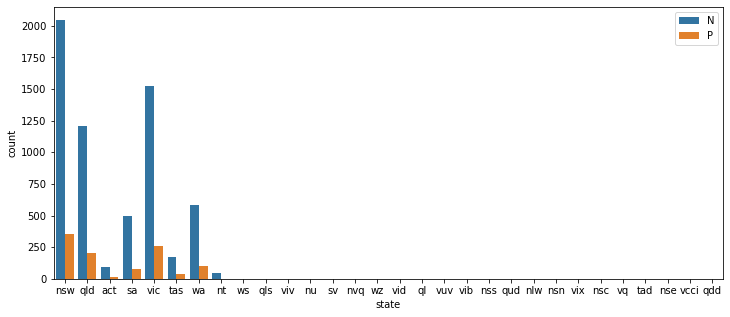

In [42]:
plt.figure(figsize = (12,5))
ax = sns.countplot(x = 'state', hue = 'pcr', data = df_tested)
ax.legend(loc='upper right')

On note qu'il n'y a des tests PCR que pour 8 états: nsw, qld, act, sa, vic, tas, wa, et nt. 
Nous allons donc nous concentrer sur ces états pour la suite de l'analyse. 

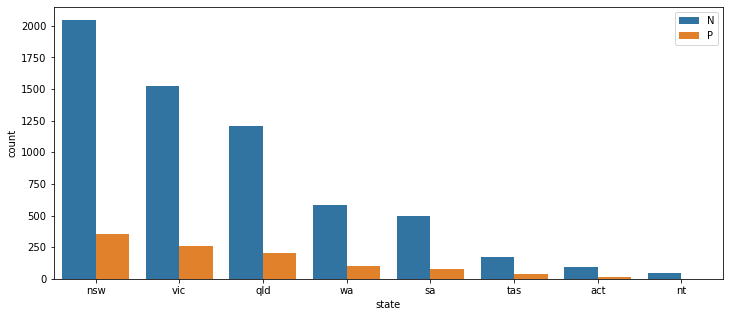

In [115]:
# countplot of the tests
plt.figure(figsize = (12,5))
ax = sns.countplot(x = 'state', hue = 'pcr', data = df_tested, order=df_tested.state.value_counts().iloc[:8].index)
ax.legend(loc='upper right')



[Text(0, 0.5, 'Percent')]

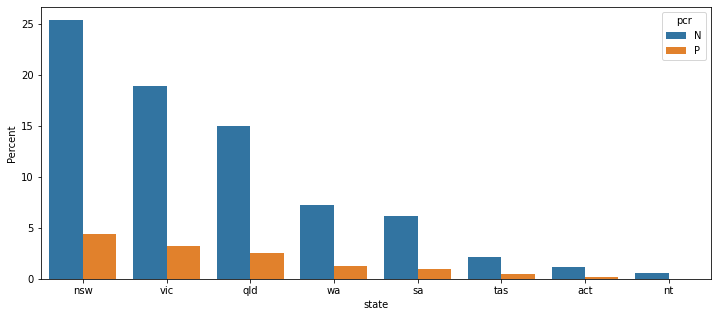

In [49]:
plt.figure(figsize = (12,5))
ax = sns.barplot(x="state", y="patient_id", hue='pcr', data=df_tested, 
                 estimator=lambda x: (len(x) / len(df_tested)) * 100, order=df_tested.state.value_counts().iloc[:8].index)
ax.set(ylabel="Percent")


On note que le plus grand nombre de test a été réalisé dans l'ordre pour nsw, vic et qld. On note aussi que le nombre de tests positifs suit le nombre de tests: Plus il y a de tests plus il y a de tests positifs. 

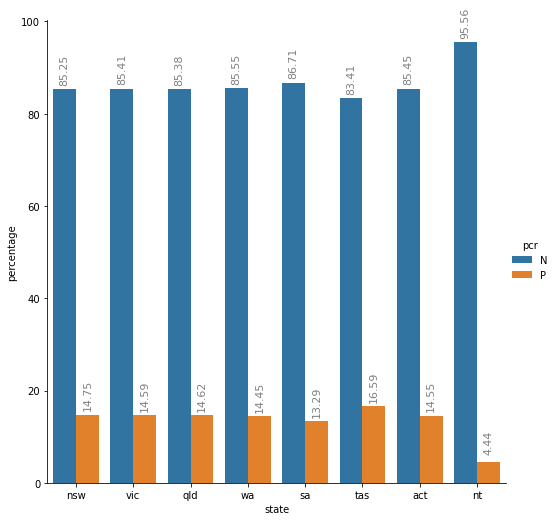

In [113]:

state_counts = (df_tested.groupby('state')['pcr']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('state'))
p = sns.catplot(x="state", y="percentage", hue="pcr", kind="bar" , data=state_counts, 
                order=df_tested.state.value_counts().iloc[:8].index , height=7)
ax = p.ax
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points') 



Lorsque l'on regarde le pourcentage de test positifs pour chaque 'state', on note des valeurs consistantes: entre 13,29 et 16,59 de tests positifs, hormis pour la région 'nt'. Or pour cet état le nombre de test est très failble donc peu significatif. Donc on peu conclure que le taux de positivité est de l'ordre de 14% dans les états testé hormis 'nt'.   
   
### Analyse de l'age des patients


<AxesSubplot:xlabel='age', ylabel='Count'>

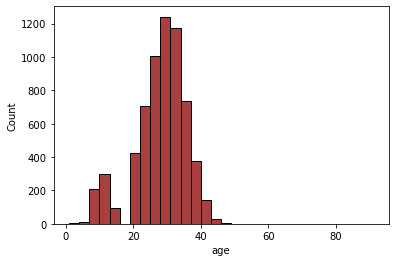

In [82]:
# age histogram
sns.histplot(df_tested['age'],kde=False,color='darkred',bins=30)

On note plusieurs chose sur l'histogramme de l'age:  
* L'amplitude des ages semble aller de 0 à 90 ans, mais au dela de 50 ans il n'y a pratiquement pas de patient
* Pour les enfants, il y a des patients de la naissance à l'adolescence. Mais il n'a pas du tout de patients à la fin de l'adoslescence (entre 17 et 19 ans) 
* La majorité des patients se trouvent dans la fourchette 25-35 ans 

Regardons si nous pouvons extraire plus d'information avec un boxplot. 

<AxesSubplot:xlabel='pcr', ylabel='age'>

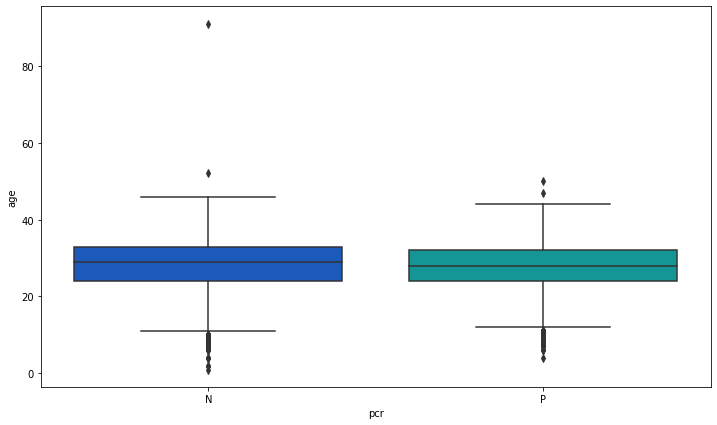

In [116]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pcr',y='age',data=df_tested,palette='winter')

Le boxplot montre qu'il y a un 'outlier': Un patient de plus de 90 ans. Nous avons également la confirmation que la majorité des patients se trouvent dans la fourchette 25-35 ans. La médiane est légèrement inférieure pour les patients avec un test positif. 
Regardons un peu plus en détail les résultats des tests. 
Nous avons enlevé le patient de plus de 90 ans du graphique. 


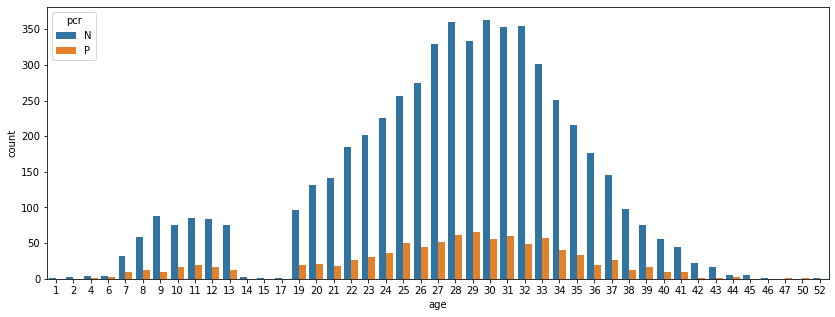

In [66]:
fig, ax1 = plt.subplots(figsize = (14,5))
sns.countplot(x = 'age', hue = 'pcr', data = df_tested[df_tested['age'] < 91.0])
ax1.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])
ax1.xaxis.set_tick_params()

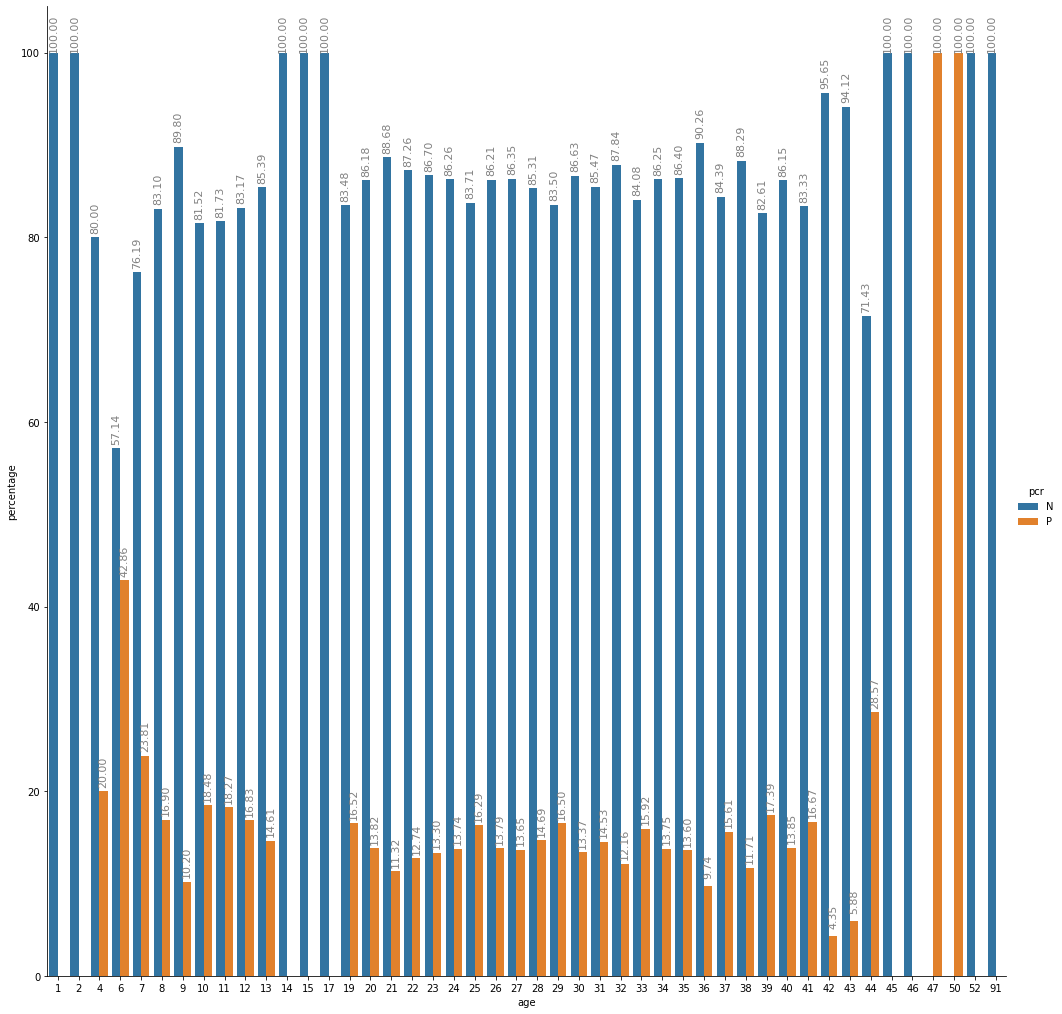

In [124]:
# fig, ax1 = plt.subplots(figsize = (14,5))

age_counts = (df_tested.groupby('age')['pcr']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))
# sns.barplot(x="age", y="percentage", hue="pcr", data=age_counts)
# ax1.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax1.get_xticklabels()])
# ax1.xaxis.set_tick_params()

p = sns.catplot(x="age", y="percentage", hue="pcr", kind= "bar", height=14, data=age_counts)
ax = p.ax

ax.set_xticklabels(['{:.0f}'.format(float(t.get_text())) for t in ax.get_xticklabels()])
ax.xaxis.set_tick_params()

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points') 


Pour les adultes, les tests les plus significatifs (plus de 100 tests) sont pour les ages compris entre 19 et 38 ans. On voit cela sur le premier graphique ci-dessus. Pour les enfants les tests significatifs sont pour les ages 9-13 ans. 
Parmi ces ages, on note des disparités: les enfants de 9 ans ont le plus faible taux de positivité: 10,20%. Mais pour les enfants de 10 ans, ce taux monte à 18,48%.   
Pour les adultes le taux varie de 9.74% (36 ans) à 16,52% (19 ans). Mais le mode (le taux le plus fréquent) est de l'ordre de 13%. Nous sommes encore très proche du taux de positivité par région qui était de l'ordre de 14%. 



<Figure size 864x360 with 0 Axes>

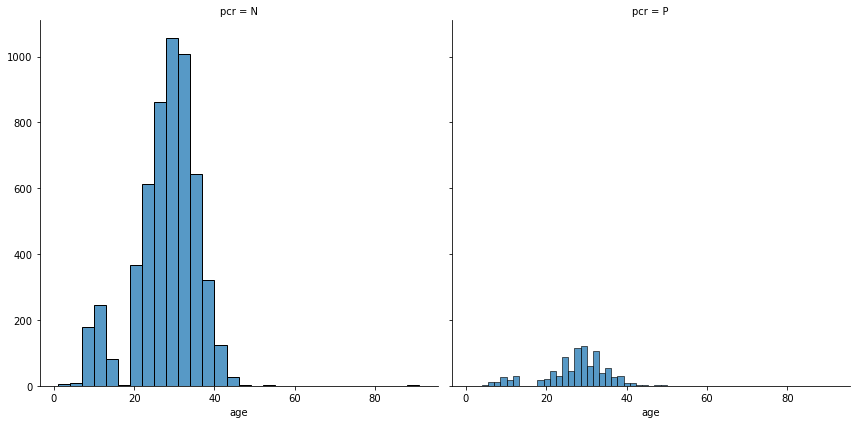

In [24]:
plt.figure(figsize = (12,5))
G = sns.FacetGrid(data=df_tested, col = 'pcr', height=6)
G.map(sns.histplot, 'age', kde=False, bins=30)